<a href="https://colab.research.google.com/github/V-AISHVARYA/LGMVIP-DataScience-Task-7/blob/main/Development_of_a_neural_network_that_can_read_handwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**LGMVIP TASK7**:
**Development of a Neural Network that can read Handwriting**  
Begin your neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN. It has a very user-friendly interface that’s ideal for beginner

~Aishvarya.V



**Link for the dataset:** http://yann.lecun.com/exdb/mnist/

# Importing the necessary libraries

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt

# Loading the MNIST dataset

In [16]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
#The MNIST Dataset is conatined in the Tensorflow library and can be loaded using Keras. The dataset is then further divided into the training and test sets

# Visualizing the dataset

In [3]:
X_train.shape

(60000, 28, 28)

The training dataset contains 60,000 images where each is 28x28 pixel greyscale image.

In [4]:
Y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

The training dataset contains 10,000 images where each is 28x28 pixel greyscale image

### Checking the values of each pixel before the normalization process

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### Visualising the dataset

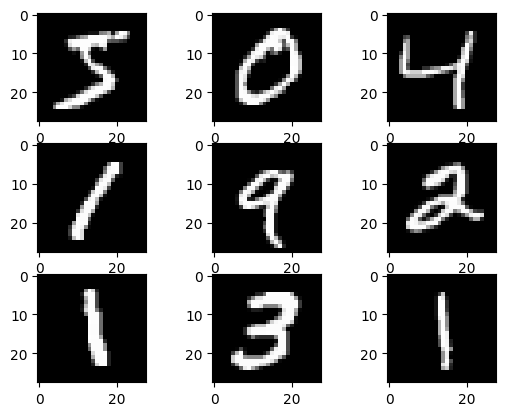

In [7]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

### Reshaping the data

In [8]:
X_train_r = X_train.reshape(X_train.shape[0], X_train.shape[2], X_train.shape[2], 1)
X_test_r = X_test.reshape(X_test.shape[0], X_test.shape[2], X_test.shape[2], 1)

## Normalizing the data

In [9]:
X_train_r = tf.keras.utils.normalize(X_train_r, axis = 1)
X_test_r = tf.keras.utils.normalize(X_test_r, axis = 1)

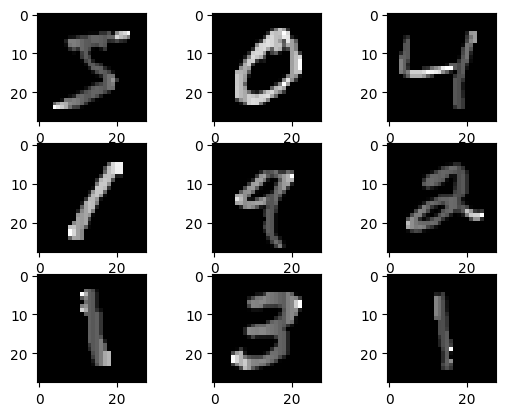

In [10]:
#Visualising the data after normalization
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(np.squeeze(X_train_r[i]), cmap=plt.get_cmap('gray'))
plt.show()

# Creating a simple CNN Model

In [11]:
image_shape = X_train_r.shape[1:]
print(image_shape)

(28, 28, 1)


In [12]:
model = model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(48, (3,3), activation = tf.nn.relu, input_shape = image_shape))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = tf.nn.relu))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

In [13]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train_r, Y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 24s 4ms/step - loss: 0.1799 - accuracy: 0.9440
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0690 - accuracy: 0.9783
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0537 - accuracy: 0.9832
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0417 - accuracy: 0.9866
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0367 - accuracy: 0.9886
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0311 - accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0275 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0260 - accuracy: 0.9914
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0232 - accuracy: 0.9925
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0

### Summary of the CNN Model

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 48)        480       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 48)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        27712     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

### Plotting the CNN Model

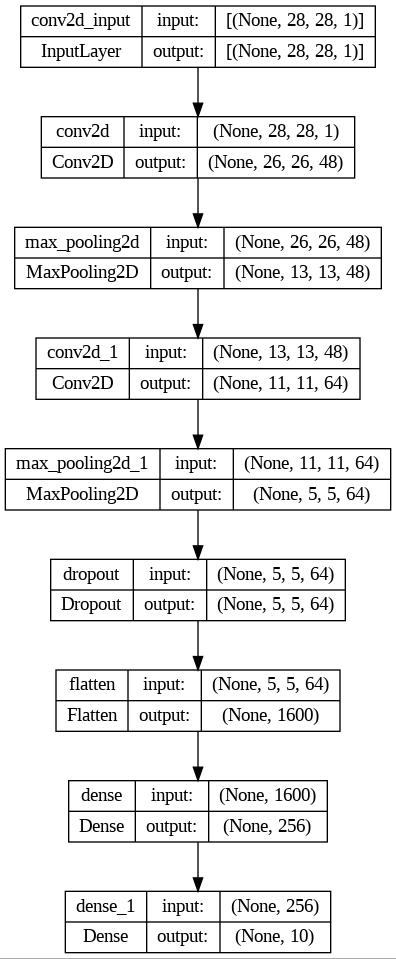

In [17]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.jpg', show_shapes = True)

# Evaluating the model based on validation loss and validation accuracy

In [19]:
val_loss, val_accuracy = model.evaluate(X_test, Y_test)
print("Validation loss : ", val_loss*100, "%")
print("Validation accuracy : ", val_accuracy*100,"%")

313/313 [==============================] - 1s 3ms/step - loss: 138.9656 - accuracy: 0.8869
Validation loss :  13896.560668945312 %
Validation accuracy :  88.6900007724762 %


### Saving the model

In [25]:
model.save('/content/drive/MyDrive/Machine Learning Projects/Mnist.model')

## Predicting a random test case

In [21]:
new_model = tf.keras.models.load_model("/content/drive/MyDrive/Machine Learning Projects/Mnist.model")


In [22]:
predictions = new_model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


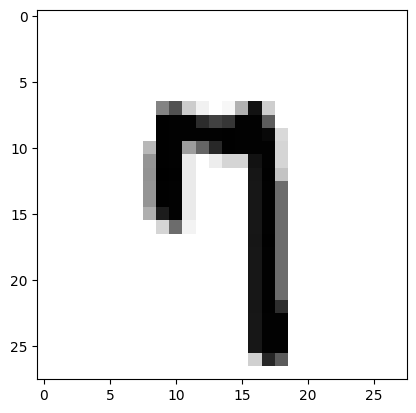

In [23]:
plt.imshow(X_test[80], cmap = plt.get_cmap('binary'))

In [24]:
print("The prediction is : ", np.argmax(predictions[80]))

The prediction is :  7


## Thank You!